In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
wine = pd.read_csv("data/train.csv", sep=';')
wine.replace({'white': 1, 'red': 0}, inplace=True)
wine1 = pd.read_csv("data/test.csv", sep=';')
wine1.replace({'white': 1, 'red': 0}, inplace=True)
submit = wine1.id
wine1 = wine1.drop(columns=['id'])

In [4]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,6.6,0.3,0.36,1.2,0.035,43,126,0.9909,3.01,0.63,11.4,6,1
1,7.7,0.5,0.26,1.9,0.062,9,31,0.9966,3.39,0.64,9.6,5,0
2,8.4,0.5,0.35,2.9,0.076,21,127,0.9976,3.23,0.63,9.2,5,0
3,7.5,0.4,0.33,5.0,0.045,30,131,0.9942,3.32,0.44,10.9,6,1
4,6.4,0.2,0.25,20.2,0.083,35,157,0.9998,3.17,0.50,9.1,5,1


In [5]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6714 entries, 0 to 6713
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6714 non-null   float64
 1   volatile acidity      6714 non-null   float64
 2   citric acid           6714 non-null   float64
 3   residual sugar        6714 non-null   float64
 4   chlorides             6714 non-null   float64
 5   free sulfur dioxide   6714 non-null   int64  
 6   total sulfur dioxide  6714 non-null   int64  
 7   density               6714 non-null   float64
 8   pH                    6714 non-null   float64
 9   sulphates             6714 non-null   float64
 10  alcohol               6714 non-null   float64
 11  quality               6714 non-null   int64  
 12  type                  6714 non-null   int64  
dtypes: float64(9), int64(4)
memory usage: 682.0 KB


In [6]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
count,6714.000000,6714.000000,6714.000000,6714.000000,6714.000000,6714.000000,6714.000000,6714.000000,6714.000000,6714.000000,6714.000000,6714.000000,6714.000000
mean,7.251638,0.348436,0.317466,5.411871,0.057506,30.132559,114.576259,0.994789,3.219103,0.536120,10.458743,5.796098,0.734733
std,1.330423,0.168505,0.148842,4.739180,0.038175,17.619884,56.417138,0.003020,0.160737,0.157877,1.189933,0.883490,0.441508
min,3.800000,0.100000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987100,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.200000,0.240000,1.800000,0.038000,16.000000,75.000000,0.992400,3.110000,0.430000,9.500000,5.000000,0.000000
50%,7.000000,0.300000,0.310000,3.000000,0.048000,28.000000,117.000000,0.995100,3.210000,0.510000,10.200000,6.000000,1.000000
75%,7.700000,0.400000,0.390000,8.000000,0.068000,41.000000,155.000000,0.997100,3.320000,0.600000,11.300000,6.000000,1.000000
max,15.900000,1.300000,1.660000,65.800000,0.611000,289.000000,440.000000,1.039000,4.010000,2.000000,14.900000,9.000000,1.000000


In [7]:
wine.shape

(6714, 13)

## Quality Check 

In [8]:
round(100*(wine.isnull().sum()/len(wine)),2).sort_values(ascending=False)

fixed acidity           0.0
volatile acidity        0.0
citric acid             0.0
residual sugar          0.0
chlorides               0.0
free sulfur dioxide     0.0
total sulfur dioxide    0.0
density                 0.0
pH                      0.0
sulphates               0.0
alcohol                 0.0
quality                 0.0
type                    0.0
dtype: float64

In [9]:
round(100*(wine.isnull().sum(axis=1)/len(wine)),2).sort_values(ascending=False)

0       0.0
4510    0.0
4482    0.0
4481    0.0
4480    0.0
       ... 
2235    0.0
2234    0.0
2233    0.0
2232    0.0
6713    0.0
Length: 6714, dtype: float64

## **No missing / Null value in either rows or columns**

In [10]:
dub_wine=wine.copy()
dub_wine.drop_duplicates(subset=None,inplace=True)

In [11]:
dub_wine.shape

(5615, 13)

In [12]:
wine.shape

(6714, 13)

## **The shape after running the drop duplicate command is not same as the original dataframe.Hence we can conclude that there were duplicate values in the dataset.**

### Assign non duplicate data to original data 

In [13]:
wine=dub_wine

In [14]:
for col in wine:
    print(wine[col].value_counts(ascending=False), '\n\n\n')

fixed acidity
6.8     288
6.6     273
6.4     253
6.9     238
7.0     233
       ... 
14.3      1
14.2      1
4.5       1
15.5      1
13.6      1
Name: count, Length: 106, dtype: int64 



volatile acidity
0.3    1816
0.2    1559
0.4     830
0.6     435
0.5     424
0.7     223
0.1     159
0.8      87
0.9      40
1.0      28
1.1       7
1.3       4
1.2       3
Name: count, dtype: int64 



citric acid
0.30    283
0.28    255
0.49    252
0.32    239
0.29    213
       ... 
1.66      1
0.77      1
0.88      1
0.91      1
1.23      1
Name: count, Length: 91, dtype: int64 



residual sugar
1.8     218
2.0     217
1.6     213
1.4     198
1.9     173
       ... 
19.9      1
19.1      1
18.5      1
17.7      1
15.9      1
Name: count, Length: 203, dtype: int64 



chlorides
0.036    165
0.046    164
0.042    154
0.040    151
0.044    150
        ... 
0.342      1
0.422      1
0.197      1
0.158      1
0.161      1
Name: count, Length: 216, dtype: int64 



free sulfur dioxide
6      152
29   

## **There seems to be no Junk/Unknown values in the entire dataset**

# *Data Split*

In [15]:
wine.shape

(5615, 13)

In [16]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5615 entries, 0 to 6713
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         5615 non-null   float64
 1   volatile acidity      5615 non-null   float64
 2   citric acid           5615 non-null   float64
 3   residual sugar        5615 non-null   float64
 4   chlorides             5615 non-null   float64
 5   free sulfur dioxide   5615 non-null   int64  
 6   total sulfur dioxide  5615 non-null   int64  
 7   density               5615 non-null   float64
 8   pH                    5615 non-null   float64
 9   sulphates             5615 non-null   float64
 10  alcohol               5615 non-null   float64
 11  quality               5615 non-null   int64  
 12  type                  5615 non-null   int64  
dtypes: float64(9), int64(4)
memory usage: 614.1 KB


In [17]:
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train,df_test=wine,wine1

In [18]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5615 entries, 0 to 6713
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         5615 non-null   float64
 1   volatile acidity      5615 non-null   float64
 2   citric acid           5615 non-null   float64
 3   residual sugar        5615 non-null   float64
 4   chlorides             5615 non-null   float64
 5   free sulfur dioxide   5615 non-null   int64  
 6   total sulfur dioxide  5615 non-null   int64  
 7   density               5615 non-null   float64
 8   pH                    5615 non-null   float64
 9   sulphates             5615 non-null   float64
 10  alcohol               5615 non-null   float64
 11  quality               5615 non-null   int64  
 12  type                  5615 non-null   int64  
dtypes: float64(9), int64(4)
memory usage: 614.1 KB


In [19]:
df_train.shape

(5615, 13)

In [20]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 820 entries, 0 to 819
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         820 non-null    float64
 1   volatile acidity      820 non-null    float64
 2   citric acid           820 non-null    float64
 3   residual sugar        820 non-null    float64
 4   chlorides             820 non-null    float64
 5   free sulfur dioxide   820 non-null    float64
 6   total sulfur dioxide  820 non-null    float64
 7   density               820 non-null    float64
 8   pH                    820 non-null    float64
 9   sulphates             820 non-null    float64
 10  alcohol               820 non-null    float64
 11  type                  820 non-null    int64  
dtypes: float64(11), int64(1)
memory usage: 77.0 KB


In [21]:
df_train.shape

(5615, 13)

# **EDA**

In [22]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5615 entries, 0 to 6713
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         5615 non-null   float64
 1   volatile acidity      5615 non-null   float64
 2   citric acid           5615 non-null   float64
 3   residual sugar        5615 non-null   float64
 4   chlorides             5615 non-null   float64
 5   free sulfur dioxide   5615 non-null   int64  
 6   total sulfur dioxide  5615 non-null   int64  
 7   density               5615 non-null   float64
 8   pH                    5615 non-null   float64
 9   sulphates             5615 non-null   float64
 10  alcohol               5615 non-null   float64
 11  quality               5615 non-null   int64  
 12  type                  5615 non-null   int64  
dtypes: float64(9), int64(4)
memory usage: 614.1 KB


In [23]:
df_train.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'type'],
      dtype='object')

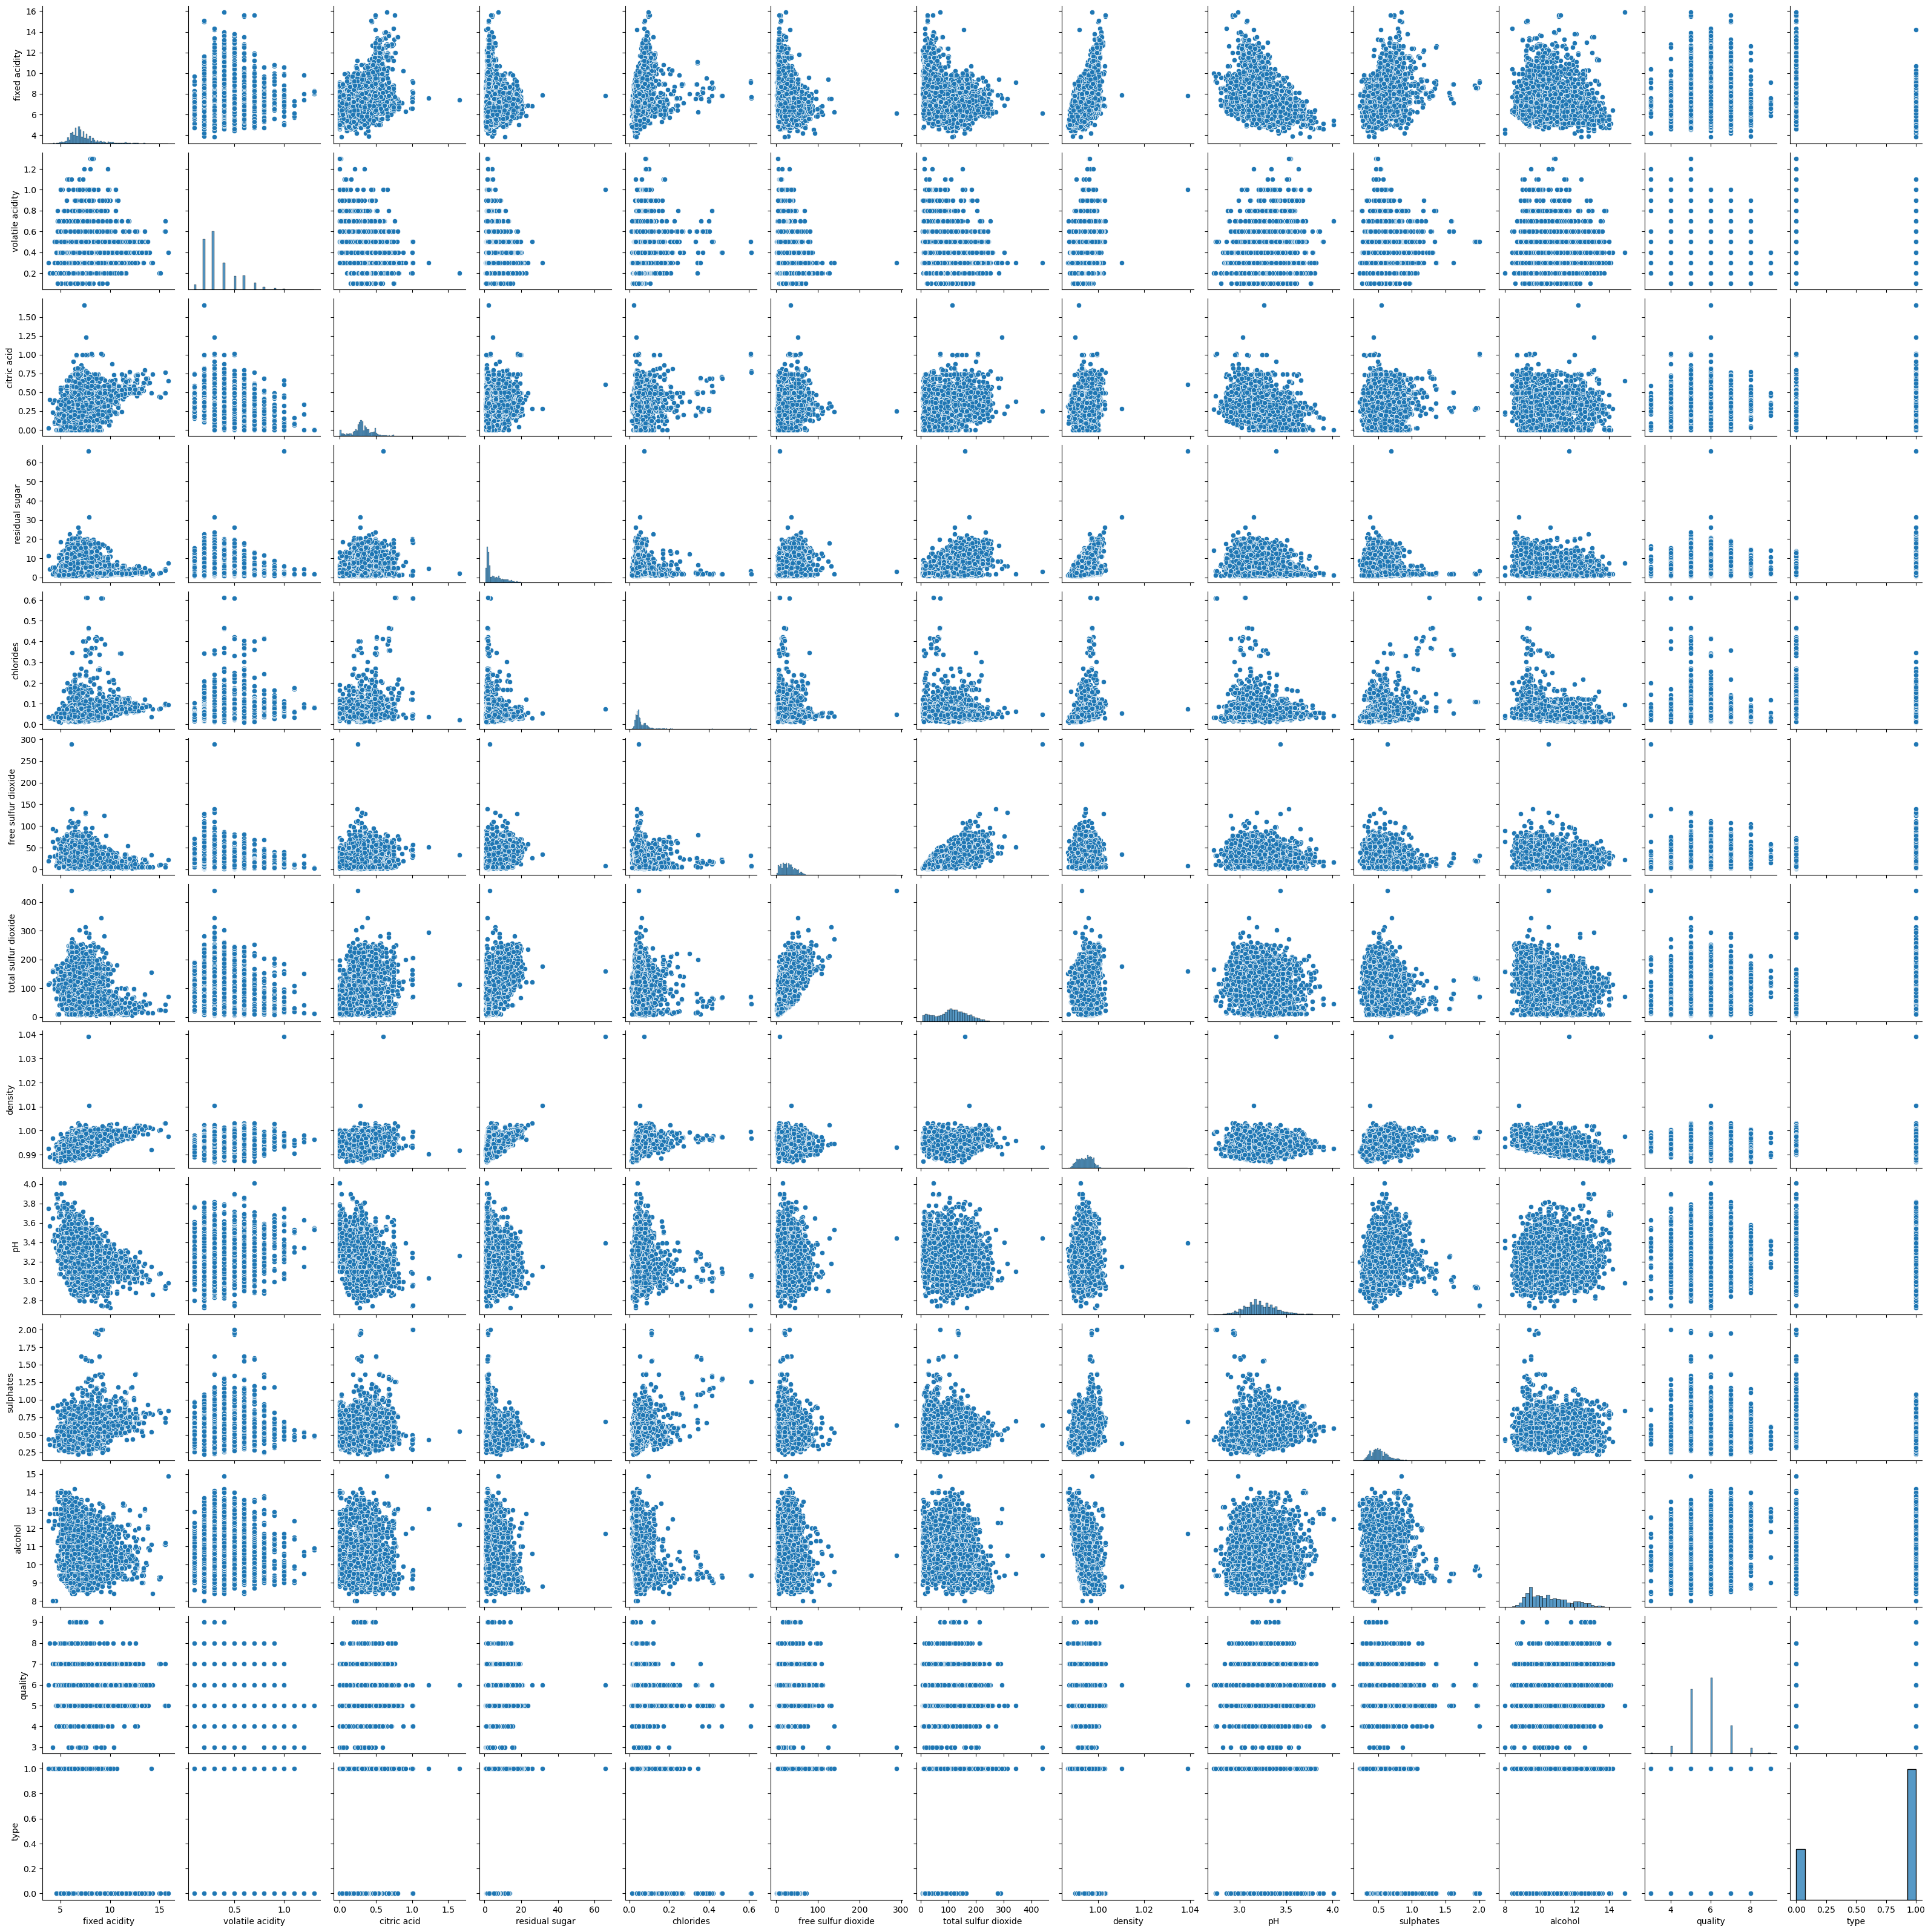

In [24]:
sns.pairplot(df_train) 
plt.show()

## Correlation Matrix

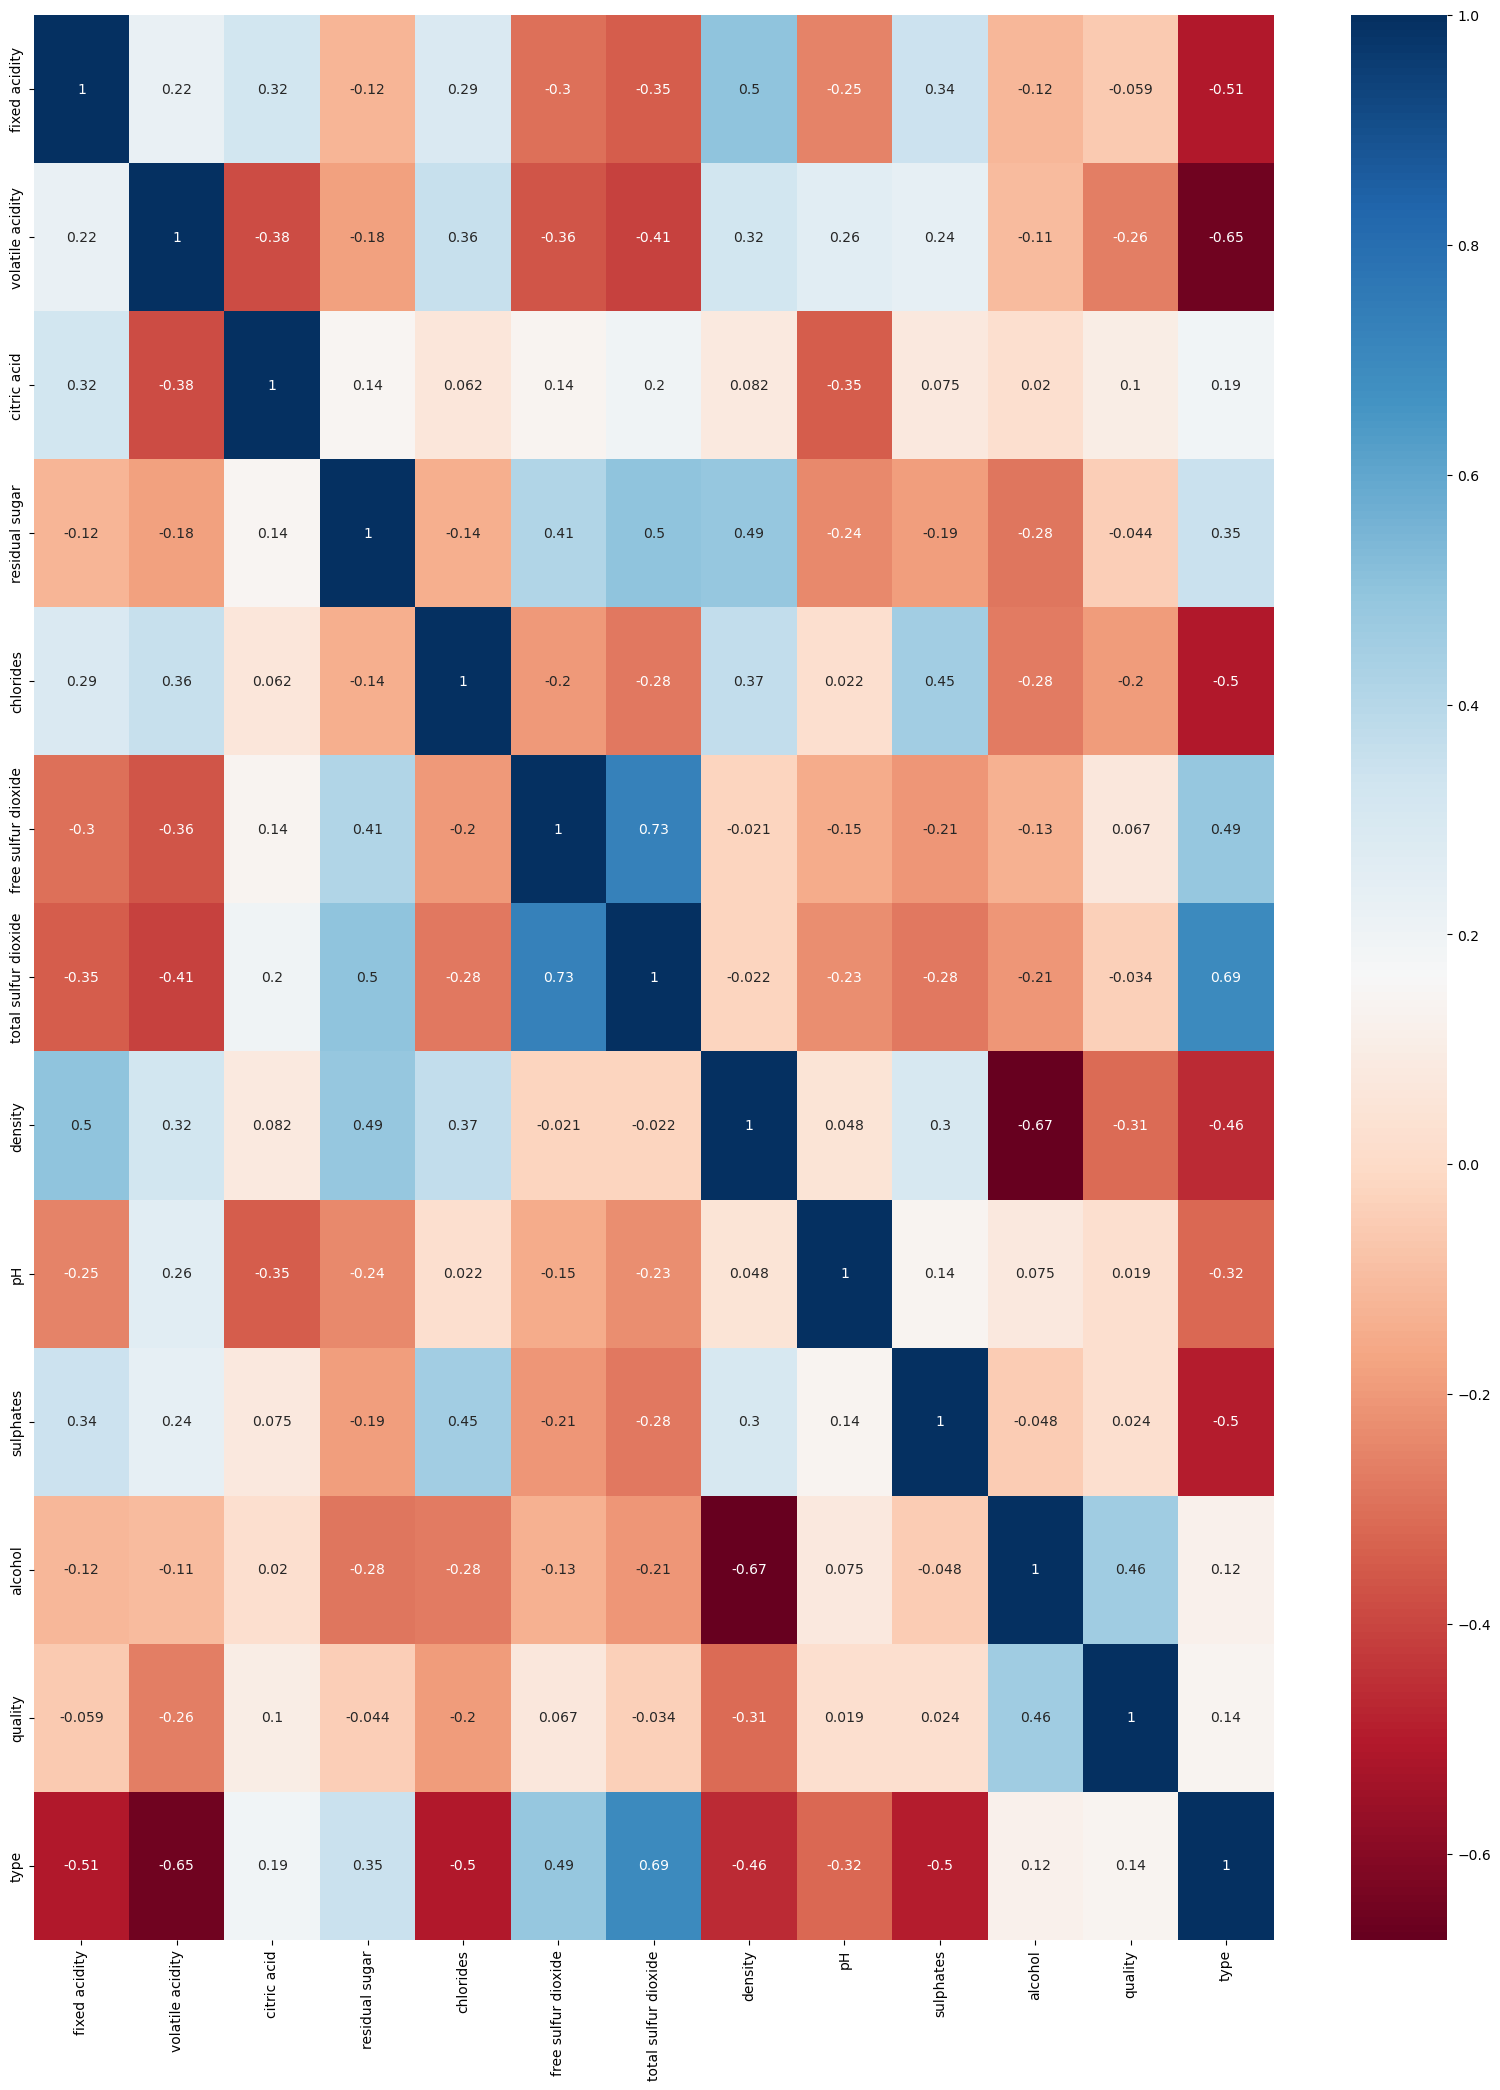

In [25]:
plt.figure(figsize=(20,25))
sns.heatmap(wine.corr(), annot=True,cmap='RdBu')
plt.show()

## Rescaling

In [26]:
from sklearn.preprocessing import MinMaxScaler

In [27]:
scaler=MinMaxScaler()

In [28]:
df_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,6.6,0.3,0.36,1.2,0.035,43,126,0.9909,3.01,0.63,11.4,6,1
1,7.7,0.5,0.26,1.9,0.062,9,31,0.9966,3.39,0.64,9.6,5,0
2,8.4,0.5,0.35,2.9,0.076,21,127,0.9976,3.23,0.63,9.2,5,0
3,7.5,0.4,0.33,5.0,0.045,30,131,0.9942,3.32,0.44,10.9,6,1
4,6.4,0.2,0.25,20.2,0.083,35,157,0.9998,3.17,0.50,9.1,5,1


In [29]:
df_train.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'type'],
      dtype='object')

In [30]:
y_train = df_train.pop('quality')
X_train = df_train

In [31]:
X_train[:]=scaler.fit_transform(df_train[:])

In [32]:
X_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0.231405,0.166667,0.216867,0.009202,0.043189,0.145833,0.276498,0.073218,0.224806,0.230337,0.492754,1
1,0.322314,0.333333,0.156627,0.019939,0.088040,0.027778,0.057604,0.183044,0.519380,0.235955,0.231884,0
2,0.380165,0.333333,0.210843,0.035276,0.111296,0.069444,0.278802,0.202312,0.395349,0.230337,0.173913,0
3,0.305785,0.250000,0.198795,0.067485,0.059801,0.100694,0.288018,0.136802,0.465116,0.123596,0.420290,1
4,0.214876,0.083333,0.150602,0.300613,0.122924,0.118056,0.347926,0.244701,0.348837,0.157303,0.159420,1


In [33]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [34]:
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm,n_features_to_select=11)             
rfe = rfe.fit(X_train, y_train)

In [35]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('fixed acidity', True, 1),
 ('volatile acidity', True, 1),
 ('citric acid', False, 2),
 ('residual sugar', True, 1),
 ('chlorides', True, 1),
 ('free sulfur dioxide', True, 1),
 ('total sulfur dioxide', True, 1),
 ('density', True, 1),
 ('pH', True, 1),
 ('sulphates', True, 1),
 ('alcohol', True, 1),
 ('type', True, 1)]

In [36]:
col = X_train.columns[rfe.support_]
col

Index(['fixed acidity', 'volatile acidity', 'residual sugar', 'chlorides',
       'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH',
       'sulphates', 'alcohol', 'type'],
      dtype='object')

In [37]:
X_train.columns[~rfe.support_]

Index(['citric acid'], dtype='object')

In [38]:
X_train_rfe = X_train[col]

# Building Linear Model

## Model 1

### VIF Check

In [39]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,density,110.92
0,fixed acidity,37.70
7,pH,26.71
9,alcohol,18.75
5,total sulfur dioxide,17.97
2,residual sugar,13.46
10,type,12.19
4,free sulfur dioxide,8.08
8,sulphates,8.02
1,volatile acidity,5.54


In [40]:
import statsmodels.api as sm
X_train_lm1 = sm.add_constant(X_train_rfe)
lr1 = sm.OLS(y_train, X_train_lm1).fit()

In [41]:
lr1.params

const                   5.289257
fixed acidity           1.183322
volatile acidity       -1.452861
residual sugar          3.259347
chlorides              -0.569424
free sulfur dioxide     1.912147
total sulfur dioxide   -0.788422
density                -4.633319
pH                      0.780117
sulphates               1.246373
alcohol                 1.634998
type                   -0.221382
dtype: float64

In [42]:
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.291
Model:                            OLS   Adj. R-squared:                  0.290
Method:                 Least Squares   F-statistic:                     209.4
Date:                Thu, 18 Jan 2024   Prob (F-statistic):               0.00
Time:                        13:48:59   Log-Likelihood:                -6360.1
No. Observations:                5615   AIC:                         1.274e+04
Df Residuals:                    5603   BIC:                         1.282e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    5.2893 

## Model 2

In [43]:
X_train_new = X_train_rfe.drop(["residual sugar"], axis = 1)

### VIF

In [44]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,density,23.38
4,total sulfur dioxide,17.96
0,fixed acidity,15.18
6,pH,12.47
9,type,11.22
8,alcohol,10.94
3,free sulfur dioxide,8.04
7,sulphates,7.49
1,volatile acidity,5.24
2,chlorides,3.75


In [45]:
X_train_lm2 = sm.add_constant(X_train_new)
lr2 = sm.OLS(y_train, X_train_lm2).fit()

In [46]:
lr2.params

const                   4.871510
fixed acidity           0.079570
volatile acidity       -1.505299
chlorides              -0.773356
free sulfur dioxide     2.177591
total sulfur dioxide   -0.862791
density                 0.935833
pH                      0.201274
sulphates               1.004834
alcohol                 2.375155
type                    0.007249
dtype: float64

In [47]:
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.284
Model:                            OLS   Adj. R-squared:                  0.283
Method:                 Least Squares   F-statistic:                     222.1
Date:                Thu, 18 Jan 2024   Prob (F-statistic):               0.00
Time:                        13:48:59   Log-Likelihood:                -6389.6
No. Observations:                5615   AIC:                         1.280e+04
Df Residuals:                    5604   BIC:                         1.287e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    4.8715 

## Model 3

In [48]:
X_train_new = X_train_new.drop(["density"], axis = 1)

### VIF

In [49]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,total sulfur dioxide,17.22
8,type,11.21
5,pH,9.37
3,free sulfur dioxide,7.95
6,sulphates,7.36
0,fixed acidity,7.05
7,alcohol,6.74
1,volatile acidity,4.91
2,chlorides,3.72


In [50]:
X_train_lm3 = sm.add_constant(X_train_new)
lr3 = sm.OLS(y_train, X_train_lm3).fit()

In [51]:
lr3.params

const                   4.977776
fixed acidity           0.270691
volatile acidity       -1.478690
chlorides              -0.778374
free sulfur dioxide     2.214727
total sulfur dioxide   -0.770254
pH                      0.262071
sulphates               1.034062
alcohol                 2.202550
type                   -0.024073
dtype: float64

In [52]:
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.283
Model:                            OLS   Adj. R-squared:                  0.282
Method:                 Least Squares   F-statistic:                     245.6
Date:                Thu, 18 Jan 2024   Prob (F-statistic):               0.00
Time:                        13:48:59   Log-Likelihood:                -6393.6
No. Observations:                5615   AIC:                         1.281e+04
Df Residuals:                    5605   BIC:                         1.287e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    4.9778 

## Model 4

In [53]:
X_train_new = X_train_new.drop(["free sulfur dioxide"], axis = 1)

### VIF

In [54]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,type,11.15
3,total sulfur dioxide,10.62
4,pH,9.28
5,sulphates,7.36
0,fixed acidity,7.05
6,alcohol,6.69
1,volatile acidity,4.84
2,chlorides,3.71


In [55]:
X_train_lm4 = sm.add_constant(X_train_new)
lr4 = sm.OLS(y_train, X_train_lm4).fit()

In [56]:
lr4.params

const                   5.126679
fixed acidity           0.143479
volatile acidity       -1.625576
chlorides              -0.765847
total sulfur dioxide    0.051515
pH                      0.230288
sulphates               0.983975
alcohol                 2.229211
type                   -0.097616
dtype: float64

In [57]:
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.273
Model:                            OLS   Adj. R-squared:                  0.272
Method:                 Least Squares   F-statistic:                     262.6
Date:                Thu, 18 Jan 2024   Prob (F-statistic):               0.00
Time:                        13:48:59   Log-Likelihood:                -6433.4
No. Observations:                5615   AIC:                         1.288e+04
Df Residuals:                    5606   BIC:                         1.294e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    5.1267 

## Model 5

In [58]:
X_train_new = X_train_new.drop(["pH"], axis = 1)

### VIF

In [59]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,type,11.07
3,total sulfur dioxide,10.37
0,fixed acidity,7.03
4,sulphates,6.79
5,alcohol,5.95
1,volatile acidity,4.01
2,chlorides,3.70


In [60]:
X_train_lm5 = sm.add_constant(X_train_new)
lr5 = sm.OLS(y_train, X_train_lm5).fit()

In [61]:
lr5.params

const                   5.282843
fixed acidity           0.003137
volatile acidity       -1.623793
chlorides              -0.838761
total sulfur dioxide    0.058085
sulphates               1.012354
alcohol                 2.238359
type                   -0.139605
dtype: float64

In [62]:
print(lr5.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.272
Model:                            OLS   Adj. R-squared:                  0.271
Method:                 Least Squares   F-statistic:                     299.1
Date:                Thu, 18 Jan 2024   Prob (F-statistic):               0.00
Time:                        13:48:59   Log-Likelihood:                -6436.0
No. Observations:                5615   AIC:                         1.289e+04
Df Residuals:                    5607   BIC:                         1.294e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    5.2828 

## Model 6

In [63]:
X_train_new = X_train_new.drop(["sulphates"], axis = 1)

### VIF

In [64]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,type,10.70
3,total sulfur dioxide,9.92
0,fixed acidity,6.14
4,alcohol,5.40
1,volatile acidity,4.00
2,chlorides,3.12


In [65]:
X_train_lm6 = sm.add_constant(X_train_new)
lr6 = sm.OLS(y_train, X_train_lm6).fit()

In [66]:
lr6.params

const                   5.454293
fixed acidity           0.081158
volatile acidity       -1.721732
chlorides              -0.435256
total sulfur dioxide    0.173717
alcohol                 2.305803
type                   -0.247116
dtype: float64

In [67]:
print(lr6.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.265
Model:                            OLS   Adj. R-squared:                  0.264
Method:                 Least Squares   F-statistic:                     337.0
Date:                Thu, 18 Jan 2024   Prob (F-statistic):               0.00
Time:                        13:48:59   Log-Likelihood:                -6462.5
No. Observations:                5615   AIC:                         1.294e+04
Df Residuals:                    5608   BIC:                         1.299e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    5.4543 

### Model 7

In [68]:
X_train_new = X_train_new.drop(["chlorides"], axis = 1)

### VIF

In [69]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,type,10.58
2,total sulfur dioxide,9.78
3,alcohol,5.39
0,fixed acidity,5.23
1,volatile acidity,3.62


In [70]:
X_train_lm7 = sm.add_constant(X_train_new)
lr7 = sm.OLS(y_train, X_train_lm7).fit()

In [71]:
lr7.params

const                   5.390993
fixed acidity           0.070851
volatile acidity       -1.731243
total sulfur dioxide    0.169994
alcohol                 2.341187
type                   -0.218552
dtype: float64

In [72]:
print(lr7.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.264
Model:                            OLS   Adj. R-squared:                  0.264
Method:                 Least Squares   F-statistic:                     402.9
Date:                Thu, 18 Jan 2024   Prob (F-statistic):               0.00
Time:                        13:48:59   Log-Likelihood:                -6465.3
No. Observations:                5615   AIC:                         1.294e+04
Df Residuals:                    5609   BIC:                         1.298e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    5.3910 

## Model 8 

In [73]:
X_train_new = X_train_new.drop(["total sulfur dioxide"], axis = 1)

### VIF

In [74]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,fixed acidity,4.83
2,alcohol,4.80
1,volatile acidity,3.29
3,type,2.96


In [75]:
X_train_lm8 = sm.add_constant(X_train_new)
lr8 = sm.OLS(y_train, X_train_lm8).fit()

In [76]:
lr8.params

const               5.417941
fixed acidity       0.069586
volatile acidity   -1.722535
alcohol             2.302999
type               -0.180808
dtype: float64

In [77]:
print(lr8.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.264
Model:                            OLS   Adj. R-squared:                  0.263
Method:                 Least Squares   F-statistic:                     503.0
Date:                Thu, 18 Jan 2024   Prob (F-statistic):               0.00
Time:                        13:48:59   Log-Likelihood:                -6466.4
No. Observations:                5615   AIC:                         1.294e+04
Df Residuals:                    5610   BIC:                         1.298e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                5.4179      0.065  

# Final Model Interpretation

## Hypothesis Testing:

Hypothesis testing states that:

H0:B1=B2=...=Bn=0
H1: at least one Bi!=0

lr8 model coefficient values
- const                0.4990
- volatile acidity    -0.3828     
- alcohol              0.4148 

### F Statistics
F-Statistics is used for testing the overall significance of the Model: Higher the F-Statistics, more significant the Model is.

F-statistic:                     227.8
Prob (F-statistic):           1.68e-81
The F-Statistics value of 227.8 (which is greater than 1) and the p-value of '~0.0000' states that the overall model is significant

### The equation of best fitted surface based on model lr8:
quality = 0.4990 - (volatile acidity × 0.3828) + (alcohol × 0.4148 ) 

### Interpretation of Coefficients:
volatile acidity: A coefficient value of ‘0.3838’ indicated that a unit decrease in volatite acidity variable, increases the quality numbers by 0.3828 units.

alcohol: A coefficient value of ‘0.4148’ indicated that a unit increase in alcohol variable, increases the quality numbers by 0.4148 units.

# ASSUMPTIONS

## Error terms are normally distributed with mean zero (not X, Y)

### Residual Analysis Of Training Data

In [78]:
y_train_pred = lr8.predict(X_train_lm8)

Text(0.5, 0, 'Errors')

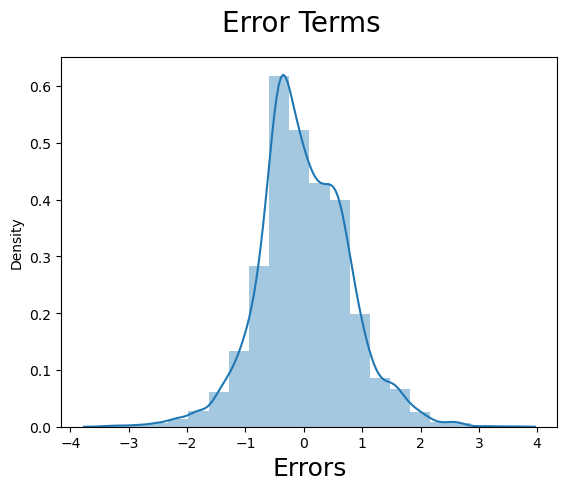

In [79]:
res = y_train-y_train_pred
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)

In [80]:
vif = pd.DataFrame()
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,fixed acidity,4.83
2,alcohol,4.80
1,volatile acidity,3.29
3,type,2.96


# MAKING PREDICTION USING FINAL MODEL

## Applying the scaling on the test sets

In [81]:
df_test[:]=scaler.fit_transform(df_test[:])

In [82]:
df_test.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0.292683,0.113333,0.474359,0.078947,0.120603,0.055749,0.094576,0.439083,0.782609,0.591398,0.702703,0
1,0.414634,0.126667,0.500000,0.311404,0.060302,0.320557,0.559110,0.632690,0.554348,0.279570,0.180180,1
2,0.500000,0.160000,0.628205,0.039474,0.087940,0.097561,0.344924,0.512063,0.358696,0.096774,0.162162,1
3,0.317073,0.053333,0.384615,0.570175,0.103015,0.209059,0.447844,0.671894,0.108696,0.204301,0.036036,1
4,0.195122,0.133333,0.717949,0.043860,0.354271,0.320557,0.275382,0.387817,0.326087,0.129032,0.126126,1


In [83]:
df_test.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
count,820.000000,820.000000,820.000000,820.000000,820.000000,820.000000,820.000000,820.000000,820.000000,820.000000,820.000000,820.000000
mean,0.300045,0.181679,0.411836,0.188225,0.106548,0.191370,0.291436,0.460644,0.474828,0.309677,0.360082,0.715854
std,0.161392,0.117580,0.189660,0.199304,0.087513,0.126163,0.168286,0.173045,0.170531,0.160377,0.214268,0.451282
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.207317,0.100000,0.307692,0.048246,0.062814,0.090592,0.160640,0.325090,0.358696,0.193548,0.180180,0.000000
50%,0.268293,0.146667,0.416667,0.078947,0.082915,0.181185,0.303199,0.469843,0.456522,0.279570,0.342342,1.000000
75%,0.353659,0.226667,0.512821,0.293860,0.128141,0.264808,0.414465,0.590470,0.597826,0.397849,0.504505,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Dividing into X_test and y_test

In [84]:
X_test = df_test
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 820 entries, 0 to 819
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         820 non-null    float64
 1   volatile acidity      820 non-null    float64
 2   citric acid           820 non-null    float64
 3   residual sugar        820 non-null    float64
 4   chlorides             820 non-null    float64
 5   free sulfur dioxide   820 non-null    float64
 6   total sulfur dioxide  820 non-null    float64
 7   density               820 non-null    float64
 8   pH                    820 non-null    float64
 9   sulphates             820 non-null    float64
 10  alcohol               820 non-null    float64
 11  type                  820 non-null    int64  
dtypes: float64(11), int64(1)
memory usage: 77.0 KB


In [85]:
#Selecting the variables that were part of final model.
col1=X_train_new.columns
X_test=X_test[col1]
# Adding constant variable to test dataframe
X_test_lm8 = sm.add_constant(X_test)
X_test_lm8.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 820 entries, 0 to 819
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   const             820 non-null    float64
 1   fixed acidity     820 non-null    float64
 2   volatile acidity  820 non-null    float64
 3   alcohol           820 non-null    float64
 4   type              820 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 32.2 KB


In [86]:
y_pred = lr8.predict(X_test_lm8)

In [87]:
y_pred

0      6.861410
1      5.462753
2      5.369780
3      5.250319
4      5.311508
         ...   
815    5.991418
816    5.298131
817    5.697388
818    6.793013
819    5.991102
Length: 820, dtype: float64

In [88]:
b = pd.Series(y_pred)  
b.name = 'quality'

In [89]:
submit = submit.to_frame().join(b)

In [90]:
submit

,id,quality
0,1257,6.861410
1,6409,5.462753
2,136,5.369780
3,1631,5.250319
4,6084,5.311508
...,...,...
815,4646,5.991418
816,734,5.298131
817,5090,5.697388
818,1579,6.793013


In [91]:
submit.to_csv('submit.csv', index=False)